In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [29]:
def time_at_dist(x):
    return 0.8 * x

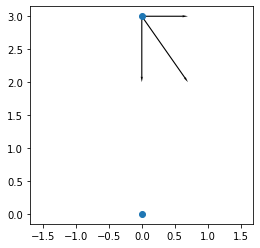

In [37]:
R = 3
vx = -1
vz = 0.7

robot = np.array([0, 0])
hub = np.array([0, R])

#[x0, y0, x1, y1]
hub_vx = [hub, np.array([0, vx])]
hub_vz = [hub, np.array([vz, 0])]
hub_v = [hub, np.array([vz, vx])]




dots = np.array([robot, hub])
arrows = np.array([hub_vx, hub_vz, hub_v])

fig, ax = plt.subplots(figsize=(4, 4))
ax.axis("equal")
plt.quiver(arrows[:, 0, 0], arrows[:, 0, 1], arrows[:, 1, 0], arrows[:, 1, 1],
        angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)
plt.scatter(dots[:, 0], dots[:, 1])
